# 복습 키워드

1. 라벨 인코더 `sklearn.preprocessing.LabelEncoder`
2. 서포트 벡터 머신 `sklearn.svm.SVC`
3. KNN 분류기 `sklearn.neighbors.KNeighborsClassifier`
4. PCA 변환 `sklearn.decomposition.PCA` -> 분류 -> 결과를 시각화
5. tSNE 변환 `sklearn.manifold.TSNE` -> 변환 후 KNN 분류
6. 분류 정확도 평가 `sklearn.metrics.accuracy_score`

In [ ]:
# 라벨 인코더
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(['cat', 'dog', 'fish', 'cat', 'dog'])

In [ ]:
le.transform(['cat', 'cat', 'cat', 'dog', 'fish'])

In [ ]:
le.inverse_transform([0, 1, 2, 0])

In [ ]:
le.classes_

In [ ]:
# 서포트 벡터 머신
from sklearn.svm import SVC

xs = [[0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 1],
      [0, 0, 2], [1, 0, 2], [0, 1, 2], [1, 1, 2]]
ys = [0, 1, 0, 1, 1, 1, 0, 1]
clf = SVC(kernel='rbf')
clf.fit(xs, ys)

y_pred = clf.predict([[0, 0, 1], [1, 0, 2], [0, 1, 2], [1, 1, 2]])

In [ ]:
# 고차원은 시각화가 어렵기 때문에 차원을 내린다. PCA 변환
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(xs)
pca_xs = pca.transform(xs)  # 2차원으로 축소된 도메인

import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.scatter(pca_xs[:, 0], pca_xs[:, 1], c=ys, cmap='jet')
plt.title('PCA 변환 후 시각화')
plt.show()

In [ ]:
# tSNE 변환
import seaborn as sns
from sklearn.manifold import TSNE

titanic = sns.load_dataset('titanic')
xs = titanic[['age', 'fare', 'sibsp', 'parch']]
ys = titanic['survived']

# 먼저 차원 내림
tsne = TSNE(n_components=2, perplexity=10, max_iter=500)  # 성능 좋은 것 찾을 수 있음
xs_tsne = tsne.fit_transform(xs.fillna(0))

# 이후 KNN 분류기 처리
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xs_tsne, ys)  # 결측치는 0으로 채움

# KNN 분류기 예측
predictions = knn.predict(xs_tsne)

plt.figure(figsize=(10, 6))

plt.scatter(xs_tsne[:, 0], xs_tsne[:, 1], c=ys, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('tSNE 변환 후 시각화')
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.show()


# 불순도 `impurity`

의사결정트리는 독특한 시각화 기법과 제어 방법을 가진 성능 좋은 분류 기법이다. 우리는 의사결정트리가 어떻게 그룹을 나누는지 이해하기 위해, 그 수식에 대해 고민해 볼 것이다.


## 1. 지니 불순도 $Gini(S) = 1 - \sum_{i=1}^{c} p_i^2$

이탈리아 수학자 지니.. 누구 이름을 따서 만든 기법.

- $S$ = 데이터 집합
- $c$ = 클래스의 개수
- $p_i$ = 독립추출 1회에서 어떤 클래스 $i$가 나올 확률
- $p_i ^2$은 두 번의 독립시행에서 모두 클래스 $i$가 나올 확률
- $Gini(S)$는 두 번 독립시행하여 서로 다른 클래스가 나올 확률이다.


## 2. 엔트로피 $Entropy(S) = - \sum_{i=1}^{c} p_i \log_2 p_i$

정보 이론가 클로드 섀넌이 만든 놀라움의 정량화 기법

- 드문 일일수록 많은 정보를 담고 있다. (정보량이 크다)
- 정보량 = $log_2 \left(\dfrac{1}{확률}\right)$

근데 왜 하필이면 log_2 인가?

- 정보량을 2진수로 표현하기 위해서

정보에 대한 관점 : 정보는 2진수로 표현된다. `너는 사람입니까?` yes -> `살아있습니까?` yes -> `주황색입니까?` NO

동전 던지기의 경우 동전은 앞면/뒷면 결과만 가진다. 동전의 정보량은 1비트이며, 이는 $log_2(2)$이다.

각 사건의 확률이 균일하지 않더라도, 특정 사건 $P$의 확률이 $p$라고 하면, 그 사건의 정보량은 $log_2 \left(\dfrac{1}{p}\right)$이다.

$p_i$가 클래스 $i$가 뽑힐 확률이라고 하면, $log_2 \left(\dfrac{1}{p_i}\right)$는 클래스 $i$가 뽑히는 사건의 정보량이고,

거기에 확률 $p_i$를 곱해 다 더하면 이는 기댓값, 다시 말해 평균 정보량이 된다. 이를 **엔트로피**라 한다.


## 3. 논문이나 리포트를 쓰려고 하는데 지니 vs 엔트로피 뭐 써요?

둘 다 써봐서 성능 좋은 것 선택했다고 쓰면 됨. 성능 차이 실제로 미미하고, 수학적 합리성도 비슷함.

연구 목적으로는 '몇 비트의 정보가 필요하다'고 박을 수 있기 때문에 엔트로피를 선호하는 것 같다.

# 의사결정트리



In [51]:
# 타이타닉 데이터셋 클리닝
import seaborn as sns
titanic = sns.load_dataset('titanic')

titanic.isna().sum()[titanic.isna().sum() > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [52]:
# embarked, deck 열 드롭
titanic = titanic.drop(columns=['deck', 'embarked', 'alive'])

# embark_town 최빈값
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

# age 평균값
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

clean_titanic = titanic.copy()
clean_titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,3,male,22.000000,1,0,7.2500,Third,man,True,Southampton,False
1,1,1,female,38.000000,1,0,71.2833,First,woman,False,Cherbourg,False
2,1,3,female,26.000000,0,0,7.9250,Third,woman,False,Southampton,True
3,1,1,female,35.000000,1,0,53.1000,First,woman,False,Southampton,False
4,0,3,male,35.000000,0,0,8.0500,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Second,man,True,Southampton,True
887,1,1,female,19.000000,0,0,30.0000,First,woman,False,Southampton,True
888,0,3,female,29.699118,1,2,23.4500,Third,woman,False,Southampton,False
889,1,1,male,26.000000,0,0,30.0000,First,man,True,Cherbourg,True


In [53]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

target_cols = ['sex', 'class', 'who', 'adult_male', 'embark_town', 'alone']
encoders = {}
for col in target_cols:
    encoders[col] = LabelEncoder()  # 인코더 생성
    clean_titanic[col] = encoders[col].fit_transform(clean_titanic[col])  # 라벨 인코딩 해서 열 교체

clean_titanic, encoders

(     survived  pclass  sex        age  sibsp  parch     fare  class  who  \
 0           0       3    1  22.000000      1      0   7.2500      2    1   
 1           1       1    0  38.000000      1      0  71.2833      0    2   
 2           1       3    0  26.000000      0      0   7.9250      2    2   
 3           1       1    0  35.000000      1      0  53.1000      0    2   
 4           0       3    1  35.000000      0      0   8.0500      2    1   
 ..        ...     ...  ...        ...    ...    ...      ...    ...  ...   
 886         0       2    1  27.000000      0      0  13.0000      1    1   
 887         1       1    0  19.000000      0      0  30.0000      0    2   
 888         0       3    0  29.699118      1      2  23.4500      2    2   
 889         1       1    1  26.000000      0      0  30.0000      0    1   
 890         0       3    1  32.000000      0      0   7.7500      2    1   
 
      adult_male  embark_town  alone  
 0             1            2      

In [54]:
# 의사결정트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

xs = clean_titanic.iloc[:, 1:]
ys = clean_titanic.iloc[:, 0]
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys)

tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=30, min_samples_leaf=10)
tree.fit(xs_train, ys_train)

y_pred = tree.predict(xs_test)

# 평가 (accuracy score)
from sklearn.metrics import accuracy_score
accuracy_score(ys_test, y_pred)

0.820627802690583

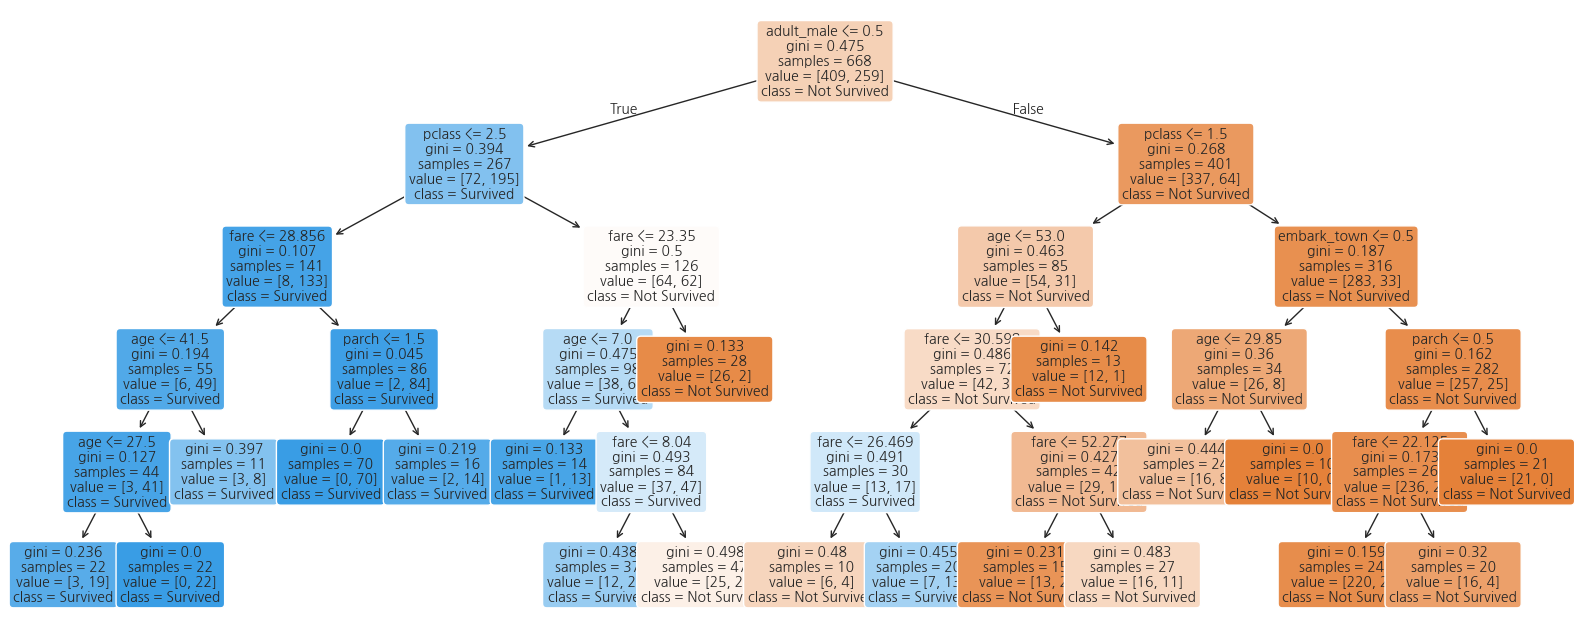

In [55]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plot_tree(tree,
          feature_names=xs.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=10)
plt.show()

## Practice 1. 펭귄

1. 펭귄 로드해서 전처리, 라벨 인코딩해서 클린 펭귄 만들기 (펭귄 전처리)
2. 트레인, 테스트 분리하고 의사결정트리 만들어서 훈련, 예측값 생성
3. 시각화

In [21]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)

encoders = {}
for col in ['species', 'island', 'sex']:
    encoders[col] = LabelEncoder()
    penguins[col] = encoders[col].fit_transform(penguins[col])

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

xs = penguins.iloc[:, 1:]
ys = penguins.iloc[:, 0]
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys)

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9523809523809523

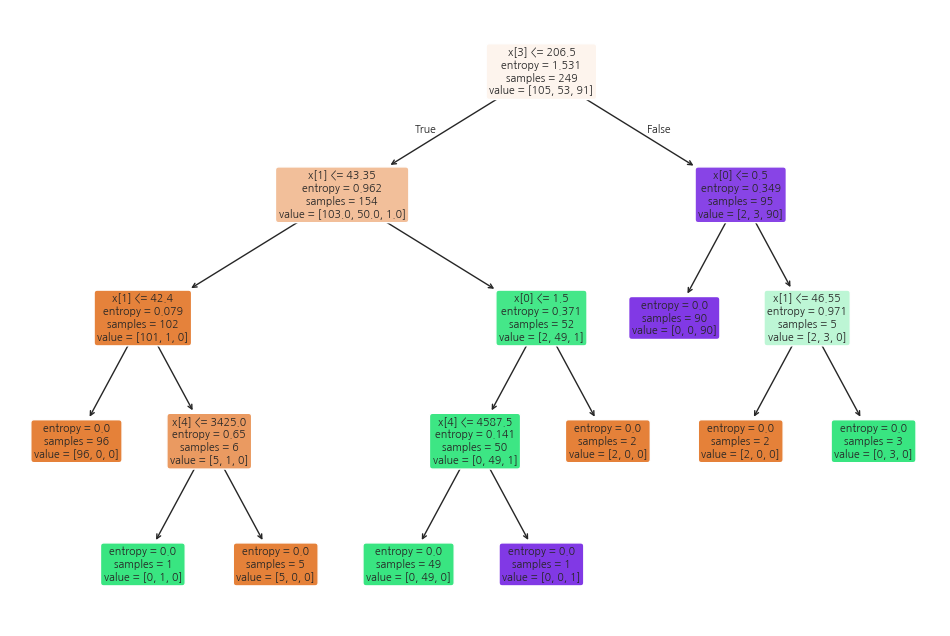

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, rounded=True)
plt.show()

# 랜덤포레스트와 앙상블 기법

앙상블 기법은 여러 약-분류기(대략 60%-ish 정확도)를 모아 강-분류기(대략 80%-ish 정확도)를 만드는 기법이다. 약-분류기는 서로 다른 특성을 가지며, 이들을 모아 강-분류기를 만든다.

앙상블 기법의 종류는 다양하다. 그 중 랜덤포레스트는 의사결정트리의 앙상블 기법이다. 랜덤포레스트는 다음과 같은 특징을 가진다.

1. **부트스트랩 샘플링**: 원본 데이터셋에서 중복을 허용하여 랜덤하게 샘플링한 데이터셋을 생성한다. 이로 인해 각 트리는 서로 다른 데이터에 대해 학습하게 된다.
2. **랜덤 피처 선택**: 각 트리를 학습할 때, 모든 특성 중 일부만을 랜덤하게 선택하여 분할 기준으로 사용한다. 이로 인해 트리 간의 다양성이 증가하고, 과적합을 방지할 수 있다.
3. **다수결 투표**: 각 트리의 예측 결과를 모아 다수결 투표를 통해 최종 예측을 결정한다. 이로 인해 개별 트리의 오류가 상쇄되어 전체 모델의 성능이 향상된다.
4. **과적합 방지**: 랜덤포레스트는 여러 트리를 결합하여 예측을 수행하기 때문에, 단일 트리에 비해 과적합의 위험이 줄어든다. 이는 모델의 일반화 능력을 향상시킨다.
5. **변수 중요도 평가**: 랜덤포레스트는 각 특성이 예측에 얼마나 기여하는지를 평가할 수 있는 기능을 제공한다. 이를 통해 중요한 특성을 식별하고, 모델의 해석력을 높일 수 있다.

결론 - 이것저것 만들어서 합쳤다!

In [92]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 모델 생성 및 학습
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, min_impurity_decrease=.1)
rf_clf.fit(xs_train, ys_train)

# 예측
rf_y_pred = rf_clf.predict(xs_test)

# 정확도 평가
rf_accuracy = accuracy_score(ys_test, rf_y_pred)
print(f'랜덤포레스트 정확도: {rf_accuracy:.2f}')

랜덤포레스트 정확도: 0.75


In [57]:
rf_clf.estimators_

[DecisionTreeClassifier(max_depth=6, max_features='sqrt', random_state=642042770),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt',
                        random_state=1397868643),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt',
                        random_state=1350225684),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt',
                        random_state=1381699327),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt',
                        random_state=1997917512),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', random_state=608804531),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt',
                        random_state=1424344535),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', random_state=457822751),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', random_state=802899405),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt',
                        random_state=1407461279),
 DecisionTreeClassif

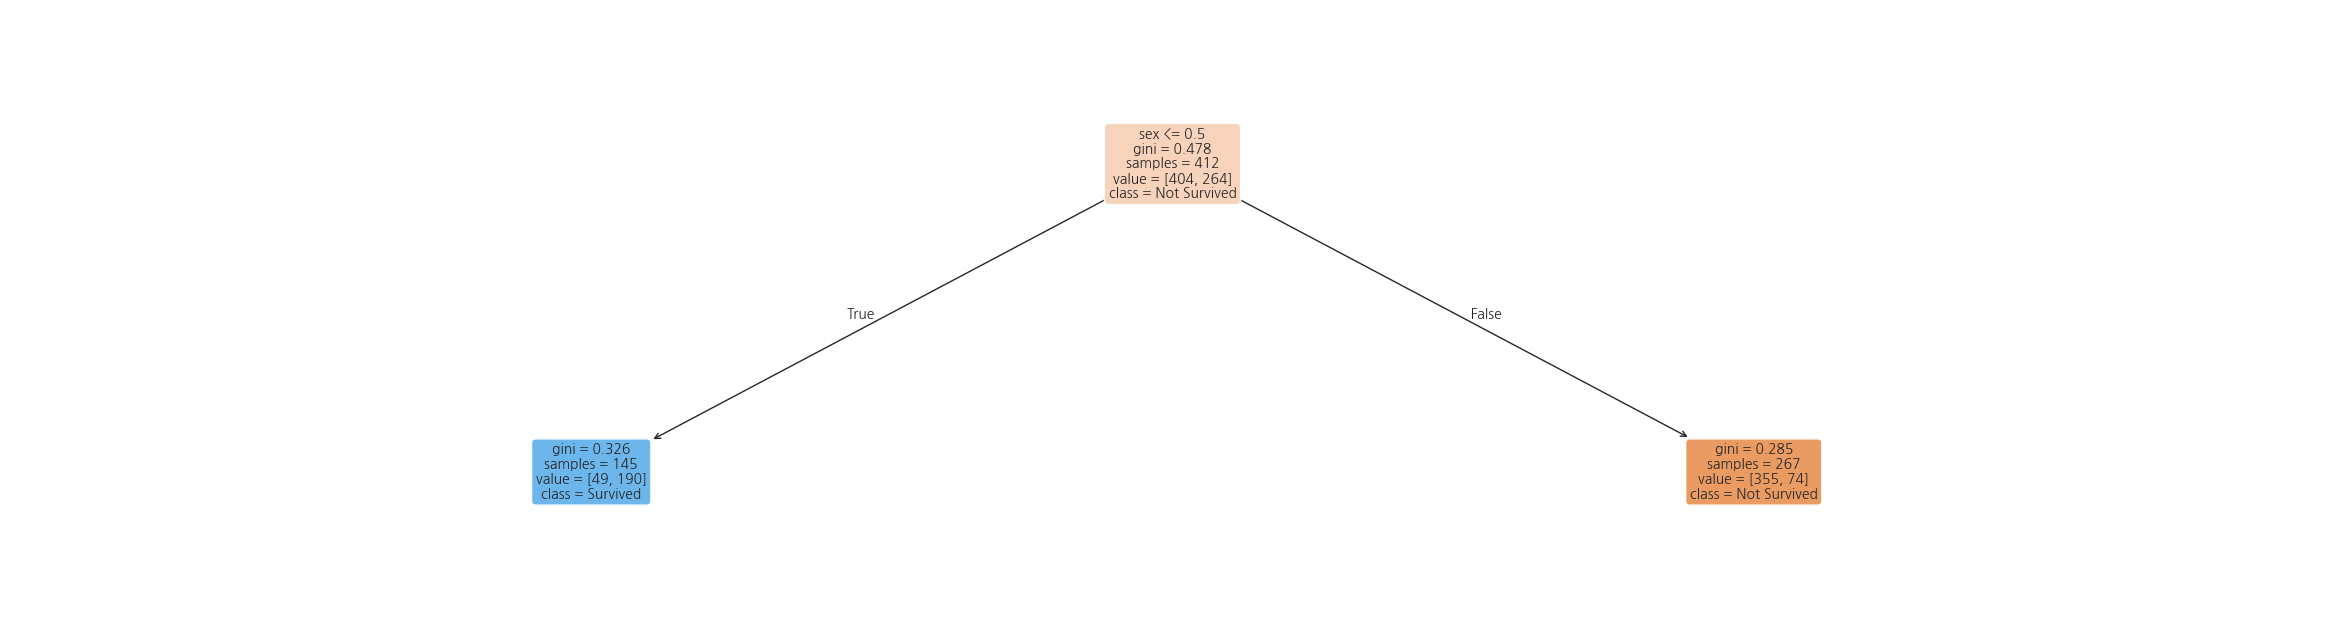

In [93]:
# 랜덤포레스트 트리 시각화
plt.figure(figsize=(30, 8))
plot_tree(rf_clf.estimators_[1],
          feature_names=xs.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=10)
plt.show()

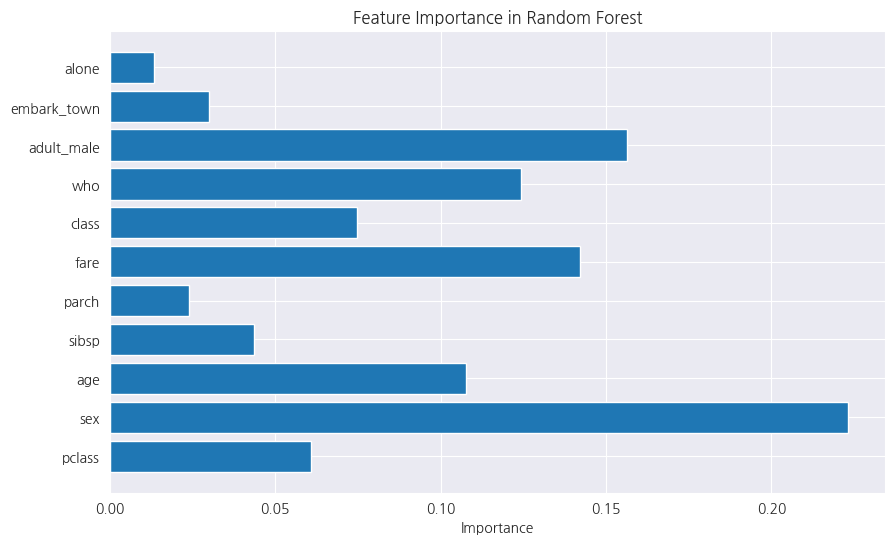

In [68]:
# 특성 중요도 시각화
feature_importance = rf_clf.feature_importances_
feature_names = xs.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

## Practice 2. 깊이별 중요도 시각화 테스트

의사결정트리의 깊이별 정확도를 구해서 시각화해본 다음, 가장 성능이 좋은 `depth`를 찾아보자.

In [104]:
x_train, x_test, y_train, y_test = train_test_split(xs, ys)

ks = []
accuracies = []
for k in range(1, 11):
    forest = RandomForestClassifier(n_estimators=100, max_depth=k)
    forest.fit(x_train, y_train)
    y_pred = forest.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    ks.append(k)
    accuracies.append(acc)

ks, accuracies

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [0.7713004484304933,
  0.7937219730941704,
  0.7982062780269058,
  0.8161434977578476,
  0.8295964125560538,
  0.8295964125560538,
  0.820627802690583,
  0.8161434977578476,
  0.8026905829596412,
  0.7982062780269058])

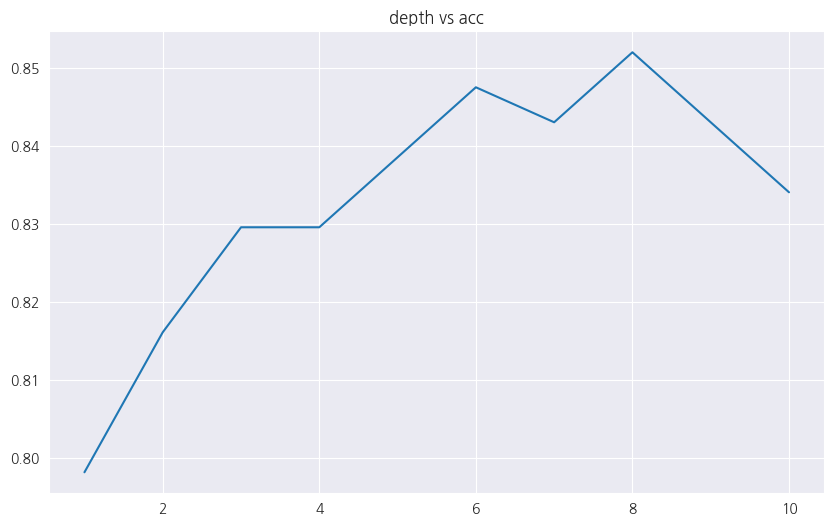

In [102]:
plt.figure(figsize=(10, 6))
plt.title('depth vs acc')
plt.plot(ks, accuracies)